In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
from scipy import stats

In [2]:
Excel=pd.ExcelFile("Datos/practica1Avanzado.xlsx")

In [3]:
Excel.sheet_names

['Hoja1',
 'Conteos_Distancia_doble',
 'Conteos_Distancia_una',
 'Voltaje',
 'Exp_Voltaje_VS_Conteos',
 'intensidad',
 'Hoja2',
 'Conteos_intensidad']

In [4]:
datos=pd.read_excel(Excel,sheet_name='Exp_Voltaje_VS_Conteos')

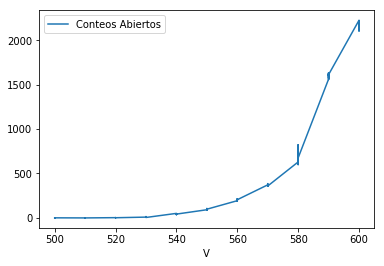

In [5]:
datos.plot(x="V",y="Conteos Abiertos",kind="line")

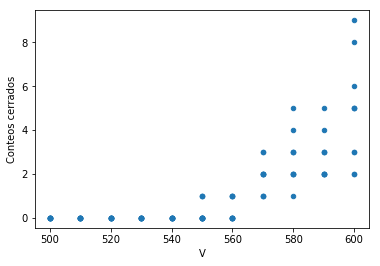

In [6]:
datos.plot(x="V",y="Conteos cerrados",kind="scatter")

In [7]:
STD_datos=datos.groupby("V").std()
STD_datos=STD_datos.reset_index()

In [8]:
Promedios_datos=datos.groupby("V").mean()
Promedios_datos=Promedios_datos.reset_index()

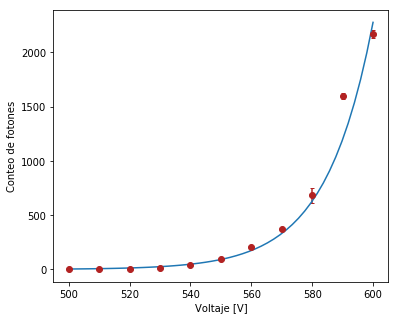

In [9]:
plt.figure(figsize=(6,5))
#plt.errorbar(Promedios_datos["V"],Promedios_datos["Conteos Abiertos"],yerr=STD_datos["Conteos Abiertos"],
 #            color="navy",capsize=2,marker='.',mfc='firebrick',ms=10,mew=1,mec='firebrick')
plt.errorbar(Promedios_datos["V"],Promedios_datos["Conteos Abiertos"],yerr=STD_datos["Conteos Abiertos"],
             capsize=2,fmt="o",color="firebrick")
plt.xlabel("Voltaje [V]")
plt.ylabel("Conteo de fotones")
x=np.linspace(500,600)
plt.plot(x,4*10**(-14)*np.exp(0.0643*x))
plt.show()

In [10]:
def model(x,a,b):
    return a*np.exp(b*x)
    #return a*np.exp(b*x)+c

In [11]:
x_obs=np.array(Promedios_datos["V"])
y_obs=np.array(Promedios_datos["Conteos Abiertos"])
sigma_y_obs=np.array(STD_datos["Conteos Abiertos"])

In [12]:
ajuste=[4*10**(-14),0.0643]

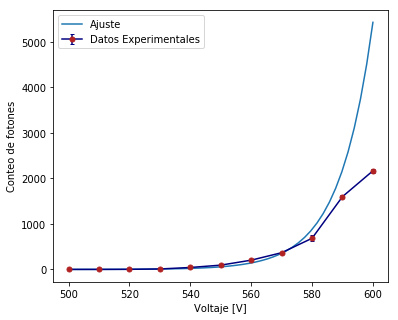

In [13]:
plt.figure(figsize=(6,5))
plt.errorbar(Promedios_datos["V"],Promedios_datos["Conteos Abiertos"],yerr=STD_datos["Conteos Abiertos"],
             color="navy",capsize=2,marker='.',mfc='firebrick',ms=10,mew=1,mec='firebrick',label="Datos Experimentales")
#plt.errorbar(x_obs,y_obs,yerr=sigma_y_obs,capsize=2,fmt="o",color="firebrick")
plt.plot(x,model(x,np.exp(-46),0.091),label="Ajuste")
#plt.plot(x,model(x,ajuste[0],ajuste[1]),label="Ajuste")
plt.xlabel("Voltaje [V]")
plt.ylabel("Conteo de fotones")
plt.legend()
plt.show()

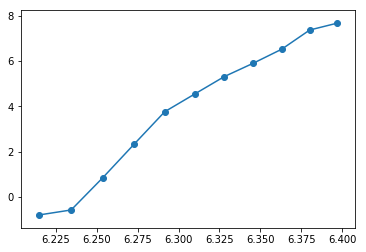

In [14]:
plt.plot(np.log(x_obs),np.log(y_obs))
plt.scatter(np.log(x_obs),np.log(y_obs))
plt.show()

In [15]:
def model(x,a,b):
    return a*x+b

In [16]:
y_obslog=np.log(y_obs)
popt, pcov = curve_fit(model, x_obs, y_obslog)
y_err=np.abs(1.0/(Promedios_datos["Conteos Abiertos"])*np.log(Promedios_datos["Conteos Abiertos"])*STD_datos["Conteos Abiertos"])
x=np.linspace(min(x_obs),max(x_obs))
perr = np.sqrt(np.diag(pcov))
R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))

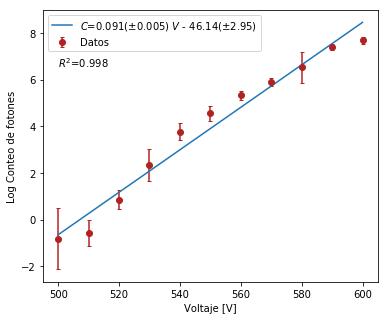

In [17]:
fig=plt.figure(figsize=(6,5))
#plt.errorbar(np.log(Promedios_datos["V"]),np.log(Promedios_datos["Conteos Abiertos"]),yerr=y_err,
             #color="navy",capsize=2,marker='.',mfc='firebrick',ms=10,mew=1,mec='firebrick',label="Datos Experimentales")
plt.errorbar(x_obs,y_obslog,yerr=y_err,capsize=2,fmt="o",color="firebrick",label="Datos")
            #ret += '({}{})'.format(i, '**%d' % num if num > 1 else '')
plt.plot(x,model(x,popt[0],popt[1]),label=r"$C$={}($\pm${}) $V$ {} {}($\pm${})".format(round(popt[0],3),
                                                                                    round(perr[0],3),"+" if popt[1]>0 else "-",
                                                                                    round(np.abs(popt[1]),2),round(perr[1],3)))

plt.text(min(x_obs), 0.85*max(y_obslog), r'$R^2$={}'.format(round(R_2,3)))
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlabel("Voltaje [V]")
plt.ylabel("Log Conteo de fotones")
plt.legend()
plt.show()

In [18]:
conteos=pd.read_excel(Excel,sheet_name='Conteos_intensidad')

In [19]:
mean=conteos.groupby("intensidad ").mean().reset_index()
mean.columns=["Intensidad","Mean"]

In [20]:
mean_sqrt=np.sqrt(conteos.groupby("intensidad ").mean()).reset_index()
mean_sqrt.columns=["Intensidad","Mean sqrt"]

In [21]:
std=conteos.groupby("intensidad ").std().reset_index()
std.columns=["Intensidad","Std"]

In [22]:
total=pd.merge(mean,std,on="Intensidad")
total=pd.merge(total,mean_sqrt,on="Intensidad")
total["Log std"]=np.log(total["Std"])

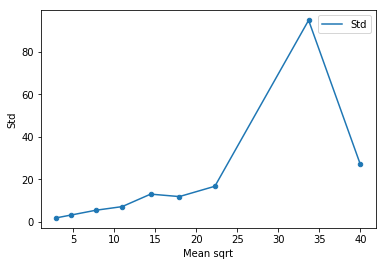

In [23]:
#ax = plt.gca()
ax=total.plot("Mean sqrt","Std",kind="scatter")
total.plot("Mean sqrt","Std",ax=ax)
plt.show()

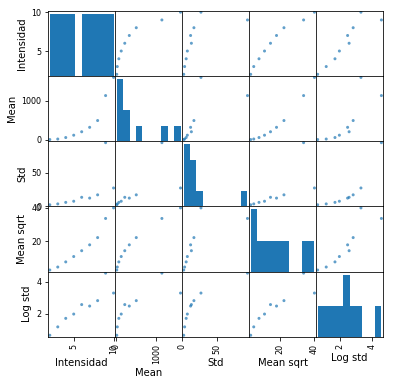

In [24]:
pd.plotting.scatter_matrix(total,figsize=(6, 6),alpha=0.7)
plt.show()

In [25]:
x_obs=total["Mean sqrt"]
y_obslog=total["Log std"]
x=np.linspace(min(x_obs),max(x_obs))
popt, pcov = curve_fit(model, x_obs, y_obslog)
perr = np.sqrt(np.diag(pcov))
R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))

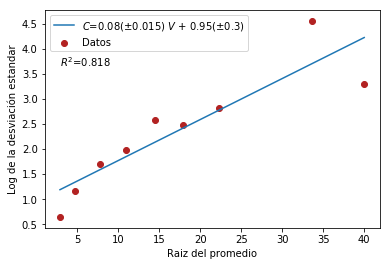

In [26]:
plt.scatter(total["Mean sqrt"],total["Log std"],color="firebrick",label="Datos")
#total.plot("Mean sqrt","Log std",ax=ax)
plt.plot(x,model(x,popt[0],popt[1]),label=r"$C$={}($\pm${}) $V$ {} {}($\pm${})".format(round(popt[0],2),
                                                                                round(perr[0],3),"+" if popt[1]>0 else "-",
                                                                                round(np.abs(popt[1]),2),round(perr[1],1)))
plt.text(min(x_obs), 0.8*max(y_obslog), r'$R^2$={}'.format(round(R_2,3)))
plt.legend()
plt.xlabel("Raiz del promedio")
plt.ylabel("Log de la desviación estandar")
plt.show()

In [27]:
def p(n,avg):
    return 1.0/(avg+1)*(avg/(avg+1))**n

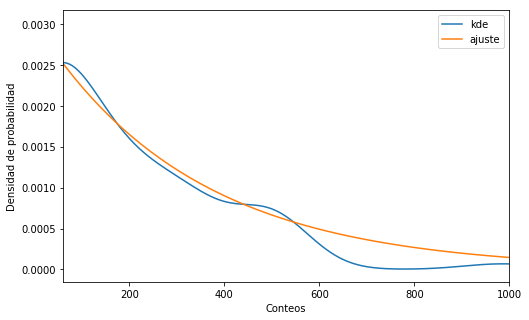

In [28]:
n=np.linspace(0,1000)
conteos[conteos.conteo<1000].conteo.plot(kind="kde",xlim=(60,1000),label="kde",bw_method="scott",figsize=(8,5))
plt.plot(n,p(n,330),label="ajuste")
plt.xlabel("Conteos")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.show()

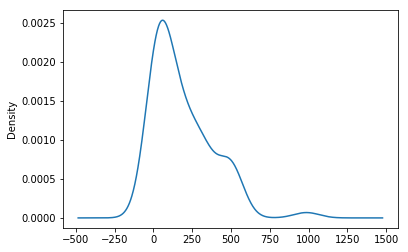

In [29]:
conteos[conteos.conteo<1000].conteo.plot.kde()

In [30]:
kernel=stats.gaussian_kde(conteos.conteo,bw_method=0.19)
ind = np.linspace(100,1000,1000)
kdepdf=kernel.evaluate(ind)

$$\alpha=\frac{\pi a}{\lambda}\sin(\theta)$$
$$\theta\approx \frac{y}{L}$$

In [31]:
def Intensidad_difraccion(alpha):
    return (np.sin(alpha)/alpha)**2
def function_alpha(y_pos):
    return np.pi*1.0*10**(-4)/(670*10**(-9))*y_pos
def Intensidad_interferencia(y_pos):
    return (np.cos((np.pi*0.000356*y_pos)/(670*10**(-9))))**2

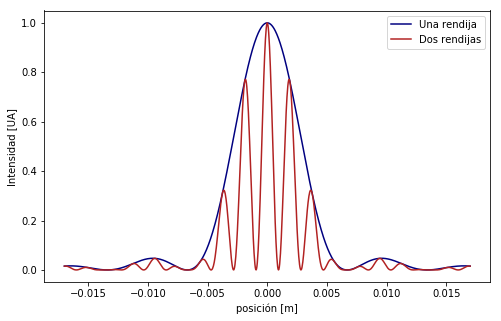

In [32]:
plt.figure(figsize=(8,5))
y=np.linspace(-0.017,0.017,1000)
plt.plot(y,Intensidad_difraccion(function_alpha(y)),color="navy",label="Una rendija")
plt.plot(y,Intensidad_interferencia(y)*Intensidad_difraccion(function_alpha(y)),color="firebrick", label="Dos rendijas")
plt.legend()
plt.xlabel("posición [m]")
plt.ylabel("Intensidad [UA]")
plt.show()

In [33]:
Intensidad_doble=pd.read_excel(Excel,sheet_name='Conteos_Distancia_doble')
Intensidad_doble["Distancia"]=Intensidad_doble["Distancia"]/1000

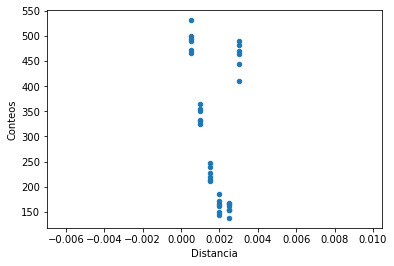

In [34]:
Intensidad_doble[Intensidad_doble["Voltaje"]==590].plot("Distancia","Conteos",kind="scatter")

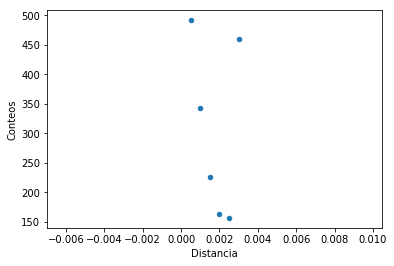

In [35]:
Intensidad_doble[Intensidad_doble["Voltaje"]==590].groupby("Distancia").mean().reset_index().plot("Distancia","Conteos",kind="scatter")

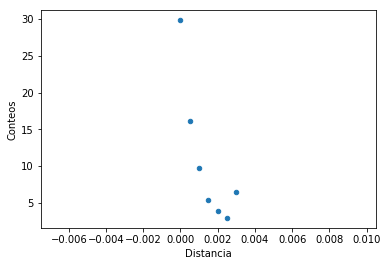

In [36]:
Intensidad_doble[Intensidad_doble["Voltaje"]==530].groupby("Distancia").mean().reset_index().plot("Distancia","Conteos",kind="scatter")

Verde entre $560 - 590$ nm

In [194]:
def Intensidad_difraccion(alpha):
    return (np.sin(alpha)/alpha)**2
def function_alpha(y_pos,wave_length):
    return np.pi*1.0*10**(-4)/(wave_length)*y_pos
def Intensidad_interferencia(y_pos,wave_length):
    return (np.cos((np.pi*13.6*10**(-5)*y_pos)/(wave_length)))**2

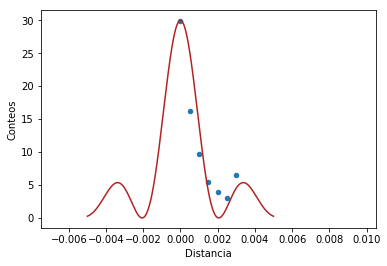

In [121]:
y=np.linspace(-5.0/1000,5.0/1000,1000)
wave_length=560*10**(-9)
Intensidad_doble[Intensidad_doble["Voltaje"]==530].groupby("Distancia").mean().reset_index().plot("Distancia","Conteos",kind="scatter")

plt.plot(y,30*Intensidad_interferencia(y,wave_length)*Intensidad_difraccion(function_alpha(y,wave_length)),color="firebrick", label="Dos rendijas")


Usar entonces las medidas tomadas a $V=530$ $\lambda=590$ nm $d=0.136$ mm


In [137]:
wave_length=530*10**(-9)
mediciones=[]
distancia_y=[]
for i in range(20):
    y = np.random.uniform(-3.3/1000,3.3/1000)
    m=30*Intensidad_interferencia(y,wave_length)*Intensidad_difraccion(function_alpha(y,wave_length))+np.random.normal(0.05,2)
    mediciones.append(m)
    distancia_y.append(y)
    m=30*Intensidad_interferencia(-y,wave_length)*Intensidad_difraccion(function_alpha(-y,wave_length))+np.random.normal(0,2)
    mediciones.append(m)
    distancia_y.append(-y)
    #30*Intensidad_interferencia(y,wave_length)*Intensidad_difraccion(function_alpha(y,wave_length)

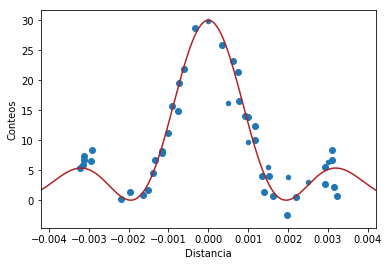

In [139]:
y=np.linspace(-5.0/1000,5.0/1000,1000)
Intensidad_doble[Intensidad_doble["Voltaje"]==530].groupby("Distancia").mean().reset_index().plot("Distancia","Conteos",kind="scatter")
plt.scatter(distancia_y,mediciones)
plt.plot(y,30*Intensidad_interferencia(y,wave_length)*Intensidad_difraccion(function_alpha(y,wave_length)),color="firebrick", label="Dos rendijas")
plt.xlim(-4.2/1000,4.2/1000)
plt.show()

In [162]:

a=np.random.choice(numeros,replace=False,size=len(numeros))
print(a)

[ 3.00000000e-03 -2.40000000e-03  2.40000000e-03  1.80000000e-03
  6.00000000e-04 -1.80000000e-03 -6.00000000e-04  1.20000000e-03
 -3.00000000e-03 -1.20000000e-03 -4.33680869e-19]


# Implementacion a usar
Usar entonces las medidas tomadas a $V=530$ $\lambda=590$ nm $d=0.136$ mm

In [204]:
def Intensidad_difraccion(alpha):
    return (np.sin(alpha)/alpha)**2
def function_alpha(y_pos,wave_length):
    return np.pi*1.0*10**(-4)/(wave_length)*y_pos
def Intensidad_interferencia(y_pos,wave_length):
    return (np.cos((np.pi*13.6*10**(-5)*y_pos)/(wave_length)))**2

In [201]:
wave_length=560*10**(-9)
numeros=[-3.0/1000+0.0001*i for i in range(60)]
for i in range(len(numeros)):
    if numeros[i]==0:
        numeros[i]=10**(-7)
position=np.random.choice(numeros,replace=False,size=len(numeros))
random_1=np.random.normal(0.05,2,len(numeros))
y_medido=30*Intensidad_interferencia(position,wave_length)*Intensidad_difraccion(function_alpha(position,wave_length))+random_1

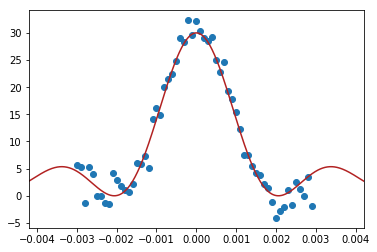

In [202]:
plt.scatter(position,y_medido)
plt.plot(y,30*Intensidad_interferencia(y,wave_length)*Intensidad_difraccion(function_alpha(y,wave_length)),color="firebrick", label="Dos rendijas")
plt.xlim(-4.2/1000,4.2/1000)
plt.show()